In [77]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [90]:
import pandas as pd
df = pd.read_csv("pm25-modis-10k.csv", index_col=0)
df.index = range(len(df))

In [91]:
regression_dictionary = {'KNN':KNeighborsRegressor(), 
                         'DT':DecisionTreeRegressor(),
                         'RF':RandomForestRegressor(),
                        'SVM':SVR(),
                        'Linear':LinearRegression()}

In [92]:
df.head()

,Cloud_Fraction,AOD,Location,Date,PM25
0,0.0,0.918,US Diplomatic Post: New Delhi,2017-01-01,156.612500
1,0.0,0.918,Mandir,2017-01-01,168.234043
2,0.0,0.389,Punjabi Bagh,2017-01-02,174.054054
3,0.0,0.389,Mandir,2017-01-02,174.979167
4,0.0,0.705,US Diplomatic Post: New Delhi,2017-01-05,166.120833


In [105]:
out = {}
for reg in regression_dictionary.keys():
    out[reg] = []
kf = KFold(n_splits=5)
X = df[['AOD','Cloud_Fraction']]
#X = df[['AOD']]
y = df.PM25

gt = []
for train_index, test_index in kf.split(df):
    X_train, X_test = X.ix[train_index], X.ix[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    gt.append(y_test)
    
    for reg_algo_name, reg in regression_dictionary.items():
        reg.fit(X_train, y_train)
        out[reg_algo_name].append(reg.predict(X_test))


/Users/nipun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [106]:
import numpy as np
for reg in regression_dictionary.keys():
    out[reg] = np.array(out[reg]).flatten()

In [107]:
pd.DataFrame(out)
out["GT"] = np.array(gt).flatten()

In [108]:
np.array(gt).flatten().shape

(1170,)

In [109]:
pd.DataFrame(out)

,DT,GT,KNN,Linear,RF,SVM
0,79.721771,156.612500,108.457766,93.666524,130.117430,83.609172
1,79.721771,168.234043,108.457766,93.666524,130.117430,83.609172
2,114.275000,174.054054,110.837576,91.552514,113.095668,82.953578
3,114.275000,174.979167,110.837576,91.552514,113.095668,82.953578
4,178.601136,166.120833,103.903000,92.815325,129.804201,83.871656
5,178.601136,155.812500,103.903000,92.815325,129.804201,83.871656
6,64.916667,151.333333,78.299506,88.893145,73.093568,81.535474
7,123.510638,139.500000,79.996792,87.512180,101.335381,80.868530
8,124.921739,159.984783,115.911849,92.343745,125.342716,83.403399
9,59.489362,152.968750,65.448667,90.369760,65.659038,81.674298


In [110]:
from sklearn.metrics import mean_absolute_error, r2_score

In [111]:
mae = {}
r2 = {}
for reg_algo_name in regression_dictionary.keys():
    mae[reg_algo_name] = mean_absolute_error(out['GT'],out[reg_algo_name])
    r2[reg_algo_name] = r2_score(out['GT'],out[reg_algo_name])
    

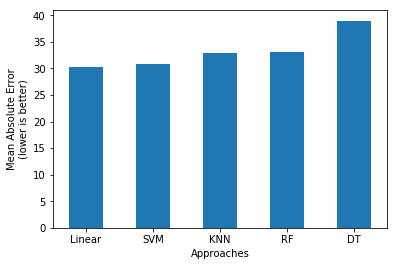

In [146]:
pd.Series(mae).sort_values().plot(kind='bar',rot=0)
import matplotlib.pyplot as plt
plt.xlabel("Approaches")
plt.ylabel("Mean Absolute Error\n(lower is better)")

In [113]:
pd.Series(r2)

DT       -0.770719
KNN      -0.259068
Linear   -0.041267
RF       -0.277091
SVM      -0.092108
dtype: float64

In [114]:
%matplotlib inline

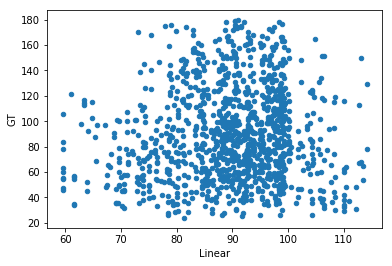

In [147]:
pd.DataFrame(out).plot(kind='scatter',x='Linear',y='GT')

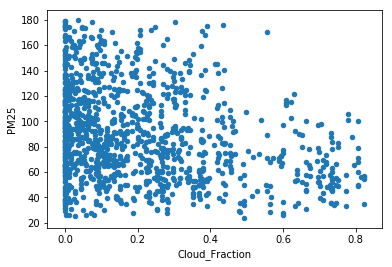

In [116]:
df.plot(kind='scatter',x='Cloud_Fraction',y='PM25')

In [117]:
o = pd.DataFrame(out)
o['Location'] = df.Location

In [123]:
e = {}
for reg in regression_dictionary.keys():
    e[reg] = (o[reg] - o['GT']).abs()

In [124]:
e['Location'] = o['Location']

In [130]:
import seaborn as sns

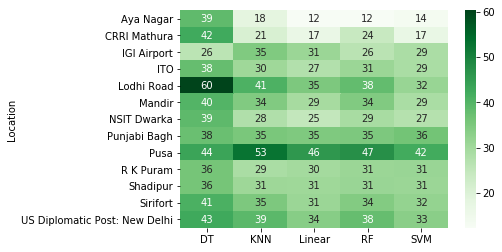

In [150]:
sns.heatmap(pd.DataFrame(e).groupby("Location").mean(), annot=True, cmap='Greens')

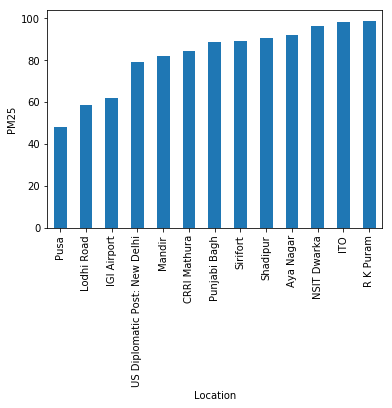

In [144]:
import matplotlib.pyplot as plt
df.groupby("Location").mean().PM25.sort_values().plot(kind='bar')
plt.ylabel("PM25")